In [21]:
import pandas as pd
import numpy as np 

# Control Numbers

##HH 
contains one record for each of the 18,965 households that completed both recruitment and retrieval.
Household demographic characteristics and summary of household members and household trips is
provided.

##PER 
contains one record for each of the 43,558 persons from 18,965 households that completed the
survey. Personal demographic data and summary of person trip information are provided.
VEH contains one record for each of 29,043 vehicles from 15,194 households that own at least one
household vehicle.

##PLACE 
contains all place records for the 231,715 places visited by 18,965 households on the assigned
travel day for 24-hour period.

##UnlinkedTrips 
contains one record for each unlinked trip or trip segment, where either the From or To
place may include a Change in Mode of travel (e.g. bus stop, train station, Park N’ Ride facility, etc).
Total number of records: 188,199 trip segments.

##LinkedTrips 
contains one record for each linked trip, where the From place represents a trip Origin
and the To place a trip Destination. For trips involving multiple modes, an “aggregate” Trip Mode is
defined, based on a prescribed hierarchy of modes (the decreasing order of hierarchy of modes is as
follows: (1) School Bus, (2)Taxi, (3) Commuter Rail, (4) Express Bus, (5) Subway, LRT, Tram, PATH,
Ferry, (6) Other Bus, (7) HOV, (8) Local Bus, (9) SOV, (10) Bike, (11) Walk, (12) Air Train or Other,
including the Trip Mode definitions for the travel measures enhancement (over-sampling) objectives
established for the Sampling Plan. Total number of records: 143,925 linked trips.

In [22]:
HH = pd.read_csv("../Mobility_Workshop/data/assignment 1/HH_Public.csv")
Per = pd.read_csv("../Mobility_Workshop/data/assignment 1/PER_Public.csv")
Linked = pd.read_csv("../Mobility_Workshop/data/assignment 1/LINKED_Public.csv")
Place = pd.read_csv("../Mobility_Workshop/data/assignment 1/PLACE_Public.csv")
Unlinked = pd.read_csv("../Mobility_Workshop/data/assignment 1/UNLINKED_Public.csv")
Veh = pd.read_csv("../Mobility_Workshop/data/assignment 1/VEH_Public.csv")

/Users/haoche/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,15,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/haoche/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (71,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/haoche/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
#show all the columns
pd.set_option('display.max_columns', None)

In [24]:
HH = HH.dropna()
HH

,SAMPN,RECMode,RETMode,CTFIP,BIN,GTYPE,STYPE,ILANG,RESTY,HHSIZ,LTELE,HHLNG,O_HHLNG,INCOM,DOW,HHVEH,HHSTU,HHWRK,HHLIC,HHCHD,HTRIPS,HTRIPS_GPS,PARTIAL,HH1,HCITY,HCITY_PL,HCITY_MCD,HSTATE,HZIP,HTAZ,HTRACT,HH_WHT2,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,HHSIZ_R,INCOM_R,HHVEH_R,HHSTRUC,HTRIPS_V,HTRIPS_T,HTRIPS_NM,HTRIPS_O,HTRIPS_WP,HTRIPS_NWP,HTRIPS_GPS_V,HTRIPS_GPS_T,HTRIPS_GPS_NM,HTRIPS_GPS_O,HTRIPS_GPS_WP,HTRIPS_GPS_NWP
0,3000056,1,3,9001,1,2,1,1,1,6,1,1,,5,3,3,4,4,4,2,24,25.931746,1,1510.00000,BROOKFIELD,,Brookfield town,CT,6804,2626,9001205100,1846.728070,6,4,3,4,3,3,1,22,2,0,0,6,18,24.104147,1.827599,0.0,0,4.471803,21.459942
1,3000128,2,1,36027,14,2,1,1,1,5,1,1,,4,4,2,3,3,3,2,8,6.837818,1,178.20000,RED HOOK,RED HOOK VILLAGE,Red Hook town,NY,12571,2438,36027150006,384.332407,5,3,2,4,2,2,1,4,4,0,0,2,6,3.182621,3.655198,0.0,0,1.503451,5.334367
2,3000139,2,2,34027,17,2,1,1,1,2,1,1,,99,2,2,0,0,2,0,0,0.000000,1,236.12500,LAKE HOPATCONG,,Jefferson township,NJ,7849,3157,34027044701,249.281773,9,5,4,2,9,2,6,0,0,0,0,0,0,0.000000,0.000000,0.0,0,0.000000,0.000000
3,3000146,1,1,34027,20,2,1,1,1,1,1,1,,5,2,1,0,1,1,0,5,7.153246,1,170.47059,MORRIS PLAINS,,Parsippany-Troy Hills township,NJ,7950,3172,34027041601,55.626717,9,5,4,1,3,1,4,5,0,0,0,2,3,7.153246,0.000000,0.0,0,2.861299,4.291948
4,3000157,2,2,34017,19,2,1,2,2,1,1,2,,1,3,0,0,0,0,0,4,3.611663,1,115.73333,NORTH BERGEN,,North Bergen township,NJ,7047,2852,34017014502,50.055108,8,5,4,1,1,0,6,2,2,0,0,0,4,1.613568,1.998095,0.0,0,0.000000,3.611663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,4133438,2,2,36081,12,2,3,1,1,3,1,1,,2,2,2,1,1,3,0,6,5.383725,1,257.40000,NEW YORK,NEW YORK CITY,Queens borough,NY,11423,552,36081047200,137.386580,2,1,1,3,1,2,4,6,0,0,0,0,6,5.383725,0.000000,0.0,0,0.000000,5.383725
18961,4133500,2,1,36081,12,2,3,1,2,4,1,1,,3,3,1,1,1,1,1,6,5.960821,1,603.42857,FRESH MEADOWS,NEW YORK CITY,Queens borough,NY,11365,536,36081122701,1912.030546,2,1,1,4,2,1,3,2,4,0,0,0,6,1.747507,4.213314,0.0,0,0.000000,5.960821
18962,4133511,2,3,36005,19,2,3,1,2,2,1,1,,4,5,2,1,1,2,0,6,4.686072,1,119.48077,NEW YORK,NEW YORK CITY,Bronx borough,NY,10475,941,36005046201,131.961961,2,1,1,2,2,2,4,6,0,0,0,4,2,4.686072,0.000000,0.0,0,3.006902,1.679170
18963,4133672,2,1,36027,14,2,3,1,1,3,1,1,,5,5,4,1,2,3,0,6,4.790648,1,229.87500,BEEKMAN,,Beekman town,NY,12570,2427,36027020005,177.818811,5,3,2,3,3,3,2,6,0,0,0,4,2,4.790649,0.000000,0.0,0,3.006902,1.783747


In [25]:
#New York City Region #CTFIP
NYC_CTFIP = [36005,36047,36061,36081,36085]
HH_NYC = HH[HH['CTFIP'].isin(NYC_CTFIP)].reset_index(drop=True)
HH_NYC

,SAMPN,RECMode,RETMode,CTFIP,BIN,GTYPE,STYPE,ILANG,RESTY,HHSIZ,LTELE,HHLNG,O_HHLNG,INCOM,DOW,HHVEH,HHSTU,HHWRK,HHLIC,HHCHD,HTRIPS,HTRIPS_GPS,PARTIAL,HH1,HCITY,HCITY_PL,HCITY_MCD,HSTATE,HZIP,HTAZ,HTRACT,HH_WHT2,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,HHSIZ_R,INCOM_R,HHVEH_R,HHSTRUC,HTRIPS_V,HTRIPS_T,HTRIPS_NM,HTRIPS_O,HTRIPS_WP,HTRIPS_NWP,HTRIPS_GPS_V,HTRIPS_GPS_T,HTRIPS_GPS_NM,HTRIPS_GPS_O,HTRIPS_GPS_WP,HTRIPS_GPS_NWP
0,3000296,2,2,36047,3,2,1,1,2,1,1,1,,1,4,0,0,0,0,0,0,0.000000,1,1325.00000,BROOKLYN,NEW YORK CITY,Brooklyn borough,NY,11225,1285,36047080200,1440.867348,2,1,1,1,1,0,6,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
1,3000403,2,2,36081,4,2,1,1,2,1,1,1,,2,4,0,0,0,1,0,2,1.613568,1,381.00000,NEW YORK,NEW YORK CITY,Queens borough,NY,11377,377,36081029300,557.518028,2,1,1,1,1,0,6,2,0,0,0,0,2,1.613568,0.000000,0.000000,0,0.000000,1.613568
2,3000490,2,2,36061,6,2,1,1,2,1,1,1,,3,3,0,0,0,0,0,0,0.000000,1,101.64516,NEW YORK,NEW YORK CITY,Manhattan borough,NY,10034,278,36061029500,607.275491,1,1,1,1,2,0,6,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
3,3000498,2,2,36081,12,2,1,1,1,2,1,1,,3,4,0,0,0,2,0,0,0.000000,1,166.33333,NEW YORK,NEW YORK CITY,Queens borough,NY,11428,697,36081056600,376.354856,2,1,1,2,2,0,6,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,3000616,2,2,36061,20,2,1,1,2,1,1,1,,4,4,1,0,1,1,0,0,0.000000,1,49.05660,NEW YORK,NEW YORK CITY,Manhattan borough,NY,10075,193,36061013800,217.663989,1,1,1,1,2,1,4,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,4133258,2,1,36081,12,2,3,1,1,1,1,1,,4,1,2,0,1,1,0,6,4.973085,1,190.12500,QUEENS VILLAGE,NEW YORK CITY,Queens borough,NY,11427,690,36081130100,118.004588,2,1,1,1,2,2,4,6,0,0,0,3,3,4.973085,0.000000,0.000000,0,2.255177,2.717909
5762,4133384,2,2,36085,18,2,3,1,1,3,1,1,,1,1,0,2,0,1,1,6,5.876568,1,142.90000,STATEN ISLAND,NEW YORK CITY,Staten Island borough,NY,10303,1561,36085023100,147.646488,2,1,1,3,1,0,5,0,4,2,0,0,6,0.000000,4.051600,1.824968,0,0.000000,5.876568
5763,4133438,2,2,36081,12,2,3,1,1,3,1,1,,2,2,2,1,1,3,0,6,5.383725,1,257.40000,NEW YORK,NEW YORK CITY,Queens borough,NY,11423,552,36081047200,137.386580,2,1,1,3,1,2,4,6,0,0,0,0,6,5.383725,0.000000,0.000000,0,0.000000,5.383725
5764,4133500,2,1,36081,12,2,3,1,2,4,1,1,,3,3,1,1,1,1,1,6,5.960821,1,603.42857,FRESH MEADOWS,NEW YORK CITY,Queens borough,NY,11365,536,36081122701,1912.030546,2,1,1,4,2,1,3,2,4,0,0,0,6,1.747507,4.213314,0.000000,0,0.000000,5.960821


In [26]:
#Exclude data without Household Income
HH_NYC_IncomSel = HH_NYC[HH_NYC['INCOM']!=99].reset_index(drop=True)
HH_NYC_IncomSel

,SAMPN,RECMode,RETMode,CTFIP,BIN,GTYPE,STYPE,ILANG,RESTY,HHSIZ,LTELE,HHLNG,O_HHLNG,INCOM,DOW,HHVEH,HHSTU,HHWRK,HHLIC,HHCHD,HTRIPS,HTRIPS_GPS,PARTIAL,HH1,HCITY,HCITY_PL,HCITY_MCD,HSTATE,HZIP,HTAZ,HTRACT,HH_WHT2,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,HHSIZ_R,INCOM_R,HHVEH_R,HHSTRUC,HTRIPS_V,HTRIPS_T,HTRIPS_NM,HTRIPS_O,HTRIPS_WP,HTRIPS_NWP,HTRIPS_GPS_V,HTRIPS_GPS_T,HTRIPS_GPS_NM,HTRIPS_GPS_O,HTRIPS_GPS_WP,HTRIPS_GPS_NWP
0,3000296,2,2,36047,3,2,1,1,2,1,1,1,,1,4,0,0,0,0,0,0,0.000000,1,1325.00000,BROOKLYN,NEW YORK CITY,Brooklyn borough,NY,11225,1285,36047080200,1440.867348,2,1,1,1,1,0,6,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
1,3000403,2,2,36081,4,2,1,1,2,1,1,1,,2,4,0,0,0,1,0,2,1.613568,1,381.00000,NEW YORK,NEW YORK CITY,Queens borough,NY,11377,377,36081029300,557.518028,2,1,1,1,1,0,6,2,0,0,0,0,2,1.613568,0.000000,0.000000,0,0.000000,1.613568
2,3000490,2,2,36061,6,2,1,1,2,1,1,1,,3,3,0,0,0,0,0,0,0.000000,1,101.64516,NEW YORK,NEW YORK CITY,Manhattan borough,NY,10034,278,36061029500,607.275491,1,1,1,1,2,0,6,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
3,3000498,2,2,36081,12,2,1,1,1,2,1,1,,3,4,0,0,0,2,0,0,0.000000,1,166.33333,NEW YORK,NEW YORK CITY,Queens borough,NY,11428,697,36081056600,376.354856,2,1,1,2,2,0,6,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,3000616,2,2,36061,20,2,1,1,2,1,1,1,,4,4,1,0,1,1,0,0,0.000000,1,49.05660,NEW YORK,NEW YORK CITY,Manhattan borough,NY,10075,193,36061013800,217.663989,1,1,1,1,2,1,4,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,4133258,2,1,36081,12,2,3,1,1,1,1,1,,4,1,2,0,1,1,0,6,4.973085,1,190.12500,QUEENS VILLAGE,NEW YORK CITY,Queens borough,NY,11427,690,36081130100,118.004588,2,1,1,1,2,2,4,6,0,0,0,3,3,4.973085,0.000000,0.000000,0,2.255177,2.717909
5415,4133384,2,2,36085,18,2,3,1,1,3,1,1,,1,1,0,2,0,1,1,6,5.876568,1,142.90000,STATEN ISLAND,NEW YORK CITY,Staten Island borough,NY,10303,1561,36085023100,147.646488,2,1,1,3,1,0,5,0,4,2,0,0,6,0.000000,4.051600,1.824968,0,0.000000,5.876568
5416,4133438,2,2,36081,12,2,3,1,1,3,1,1,,2,2,2,1,1,3,0,6,5.383725,1,257.40000,NEW YORK,NEW YORK CITY,Queens borough,NY,11423,552,36081047200,137.386580,2,1,1,3,1,2,4,6,0,0,0,0,6,5.383725,0.000000,0.000000,0,0.000000,5.383725
5417,4133500,2,1,36081,12,2,3,1,2,4,1,1,,3,3,1,1,1,1,1,6,5.960821,1,603.42857,FRESH MEADOWS,NEW YORK CITY,Queens borough,NY,11365,536,36081122701,1912.030546,2,1,1,4,2,1,3,2,4,0,0,0,6,1.747507,4.213314,0.000000,0,0.000000,5.960821


In [27]:
Per

,PSAMP,SAMPN,PERNO,GENDER,AGE_R,LIC,CTELE,RELAT,HISP,RACE,O_RACE,DISAB,DTYPE1,DTYPE2,DTYPE3,DTYPE4,O_DTYPE,EMPLY,VOLUN,WORKS,WKSTAT,JOBS,HRS1,HRS2,HRS3,TCHRS,WDAYS,COMPR,O_COMPR,INDUS,O_INDUS,OCCUP,O_OCCUP,EMPLR,O_EMPLR,WLOC,WCITY,WCITY_PL,WCITY_MCD,WSTATE,WZIP,WTAZ,WTRACT,WFIPS,WMODE,O_WMODE,FBKTW,TTTWS,CDRIV,CVEH,ESUB_1,ESUB_2,ESUB_3,O_ESUB,WSTRT,WEND,SCHED,STRVR,O_STRVR,ENDVR,O_ENDVR,STUDE,SCHOL,O_SCHOL,SLOC,SCITY,SCITY_PL,SCITY_MCD,SSTAT,SZIP,STAZ,STRACT,SFIPS,SMODE,O_SMODE,FBKTS,TTTSS,CMPLG,HVLOG,PROXY,INTRV,PTRIPS,PTRIPS_GPS,NOGO,O_NOGO,PARTIAL,HH1,HH_WHT2,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,HFIPS,LIFCYC,PTRIPS_V,PTRIPS_T,PTRIPS_NM,PTRIPS_O,PTRIPS_WP,PTRIPS_NWP,PTRIPS_GPS_V,PTRIPS_GPS_T,PTRIPS_GPS_NM,PTRIPS_GPS_O,PTRIPS_GPS_WP,PTRIPS_GPS_NWP
0,300000000.0,3000056,1,Female,35-54 years,Yes,Yes,Self,No,White,,No,NaN,NaN,NaN,NaN,,Yes,NaN,Works,NaN,1.0,10,0.0,0.0,0,Five,No,,EDUCATIONAL SERVICES,,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,,Government,,Fixed,BROOKFIELD,,Brookfield town,CT,06804,2627,9.001e+09,Fairfield,Auto Passenger,,NaN,8,No,NaN,I Do Not Use Any Employer-Provided Transportat...,NaN,NaN,,0100,0300,Yes,Start Time Cannot Vary,,16 to 30 Minutes,,No,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,Informant,NaN,6,6.032165,NaN,,Person Completed Retrieval,1510.000,1846.72810,Connecticut,Connecticut Counties,Connecticut Counties,Fairfield,Part-Time Employed,6,0,0,0,2,4,6.032165,0.0,0.0,0,1.464901,4.567264
1,300000000.0,3000056,2,Male,35-54 years,Yes,No,Spouse/Partner,No,White,,No,NaN,NaN,NaN,NaN,,Yes,NaN,Works,NaN,2.0,65,20.0,0.0,18,Five,No,,MANUFACTURING,,PERSONAL CARE AND SERVICE OCCUPATIONS,,A Private Company,,Fixed,ENGLEWOOD,ENGLEWOOD CLIFFS BOROUGH,Englewood Cliffs borough,NJ,07632,2676,3.400e+10,Bergen,Auto Passenger,,NaN,90,No,NaN,I Do Not Use Any Employer-Provided Transportat...,NaN,NaN,,0730,1900,No,Within 15 Minutes or Less,,More than 1 Hour,,No,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,Informant,NaN,2,1.503451,NaN,,Person Completed Retrieval,1510.000,1846.72810,Connecticut,Connecticut Counties,Connecticut Counties,Fairfield,Full-Time Employed,2,0,0,0,2,0,1.503451,0.0,0.0,0,1.503451,0.000000
2,300000000.0,3000056,3,Male,19-24 years,Yes,Yes,Son/Daughter,No,White,,No,NaN,NaN,NaN,NaN,,Yes,NaN,Works,NaN,1.0,8,0.0,0.0,0,One,No,,ACCOMODATION AND FOOD SERVICES,,FOOD PREPARATION AND SERVING RELATED OCCUPATIONS,,A Private Company,,Fixed,DANBURY,DANBURY CITY,Danbury town,CT,06811,2640,9.001e+09,Fairfield,Auto Passenger,,NaN,14,No,NaN,I Do Not Use Any Employer-Provided Transportat...,NaN,NaN,,1800,2330,No,More than 1 Hour,,More than 1 Hour,,Yes - Full Time,4-Year College or University,,NaN,NEW HAVEN,NEW HAVEN CITY,New Haven town,CT,06515,3408,9.009e+09,New Haven,Walk,,NaN,,NaN,NaN,Informant,NaN,4,5.210292,NaN,,Person Completed Retrieval,1510.000,1846.72810,Connecticut,Connecticut Counties,Connecticut Counties,Fairfield,Part-Time Employed,4,0,0,0,2,2,5.210292,0.0,0.0,0,1.503451,3.706841
3,300000000.0,3000056,4,Male,16-18 years,Yes,Yes,Son/Daughter,No,White,,No,NaN,NaN,NaN,NaN,,Yes,NaN,Works,NaN,1.0,16,0.0,0.0,0,Two,No,,ACCOMODATION AND FOOD SERVICES,,FOOD PREPARATION AND SERVING RELATED OCCUPATIONS,,A Private Company,,Fixed,DANBURY,DANBURY CITY,Danbury town,CT,06811,2640,9.001e+09,Fairfield,Auto Passenger,,NaN,14,No,NaN,I Do Not Use Any Employer-Provided Transportat...,NaN,NaN,,1600,2330,No,More than 1 Hour,,More than 1 Hour,,Yes - Full Time,Grade 9 to 12,,No,BROOKFIELD,,Brookfield town,CT,06804,2627,9.001e+09,Fairfield,Auto Passenger,,NaN,,NaN,NaN,Informant,NaN,4,4.822096,NaN,,Person Completed Retrieval,1510.000,1846.72810,Connecticut,Connecticut Counties,Connecticut Counties,Fairfield,School-Aged (5-17 years),4,0,0,0,0,4,4.822096,0.0,0.0,0,0.000000,4.822096
4,300000000.0,3000056,5,Female,Younger than 16 years,NaN,No,Son/Daughter,No,White,,No,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,,NaN,,Yes - Full Time,Grade 9 to 12,,No

In [28]:
#Personal data that live in NYC
Per_NYC = Per[(Per['GEO_GROUP2']=='New York City')].reset_index(drop=True)
Per_NYC_w= Per_NYC.dropna(subset=['WMODE']).reset_index(drop=True)
Per_NYC_work = Per_NYC_w[['PSAMP','WMODE']].groupby('WMODE').count().reset_index()
Per_NYC_work

,WMODE,PSAMP
0,AIRTRAIN or Airport Bus,2
1,Auto Driver,1439
2,Auto Passenger,132
3,Bike,74
4,Carpool/Vanpool/Other Group Ride,26
5,Charter Bus (Including employer-provided/Other...,26
6,DK,17
7,"Express Bus (Suburban, Commuter, Inter-city)",183
8,"Ferry (Staten Island, NY Waterway, Water Taxi,...",19
9,"Light Rail/LRT (Newark, Hudson-Bergen, River L...",13


<BarContainer object of 24 artists>

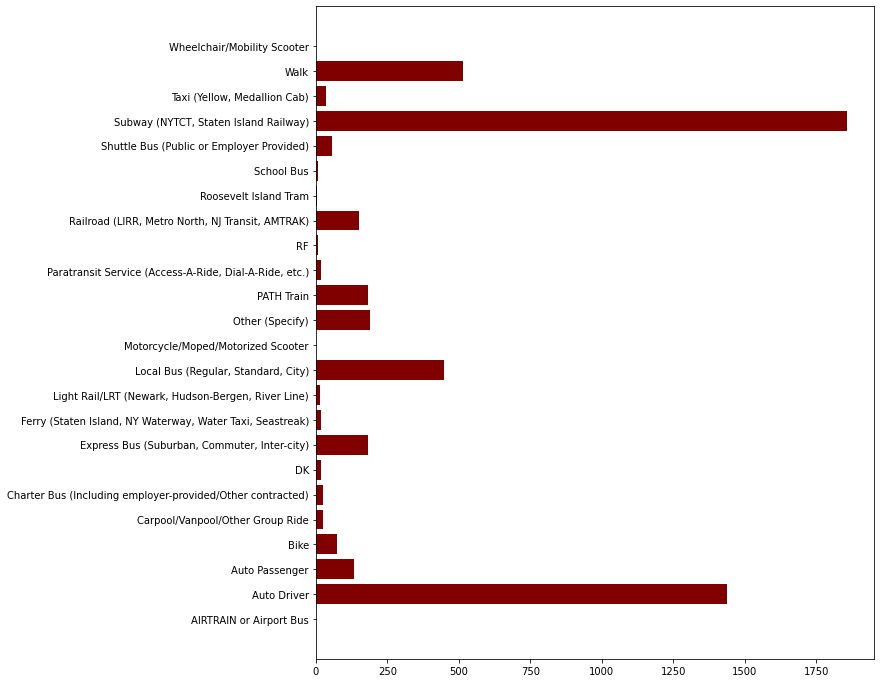

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 12))
plt.barh(Per_NYC_work['WMODE'], Per_NYC_work['PSAMP'], color ='maroon')

<BarContainer object of 22 artists>

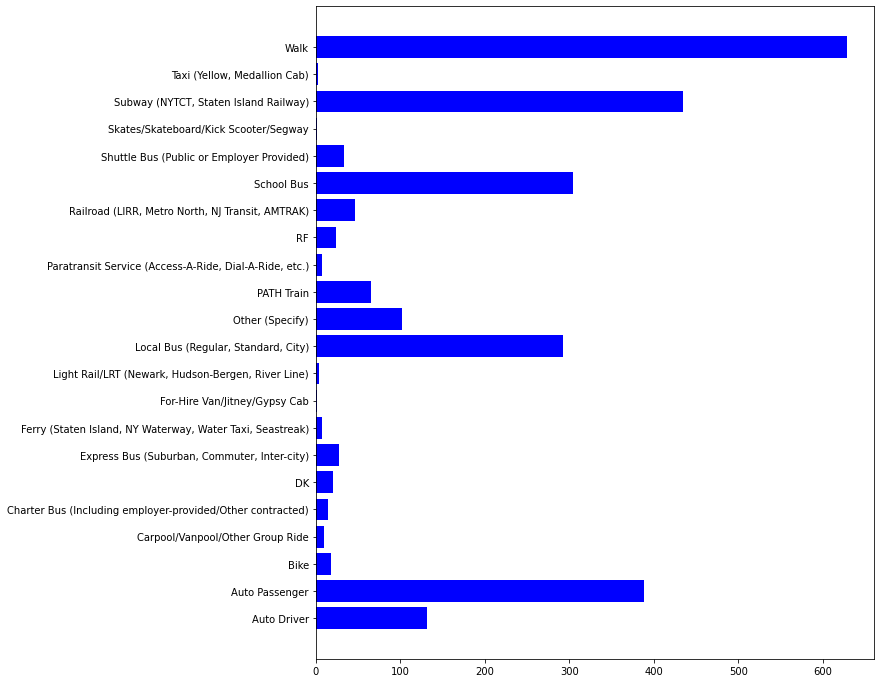

In [30]:
Per_NYC_s= Per_NYC.dropna(subset=['SMODE']).reset_index(drop=True)
Per_NYC_school = Per_NYC_s[['PSAMP','SMODE']].groupby('SMODE').count().reset_index()
fig = plt.figure(figsize = (10, 12))
plt.barh(Per_NYC_school['SMODE'], Per_NYC_school['PSAMP'], color ='blue')

<BarContainer object of 26 artists>

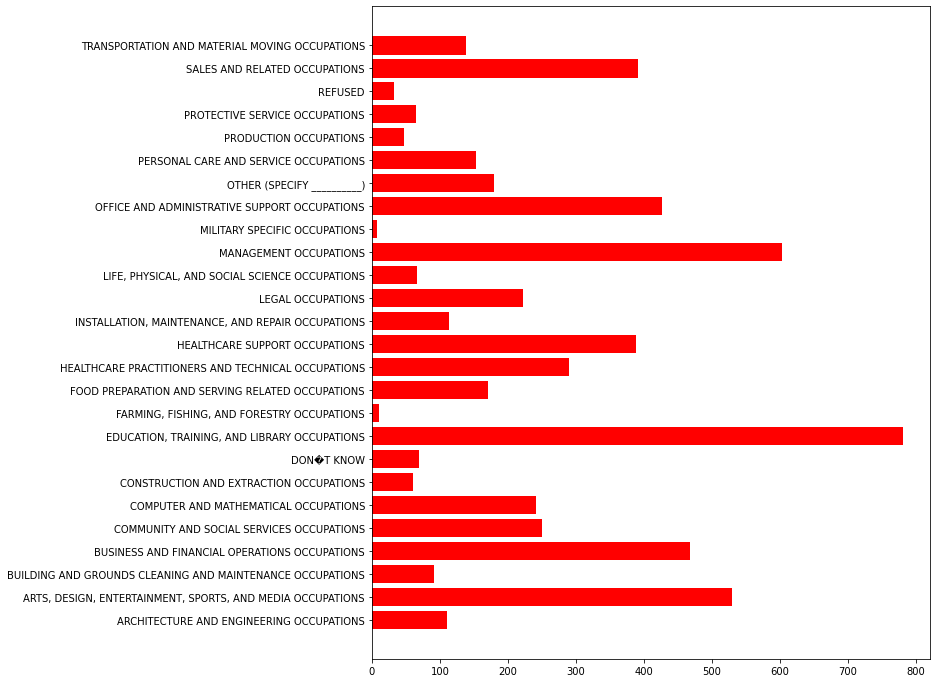

In [31]:
Per_NYC_OC= Per_NYC.dropna(subset=['OCCUP']).reset_index(drop=True)
Per_NYC_Occupation = Per_NYC_OC[['PSAMP','OCCUP']].groupby('OCCUP').count().reset_index()
fig = plt.figure(figsize = (10, 12))
plt.barh(Per_NYC_Occupation['OCCUP'], Per_NYC_Occupation['PSAMP'], color ='red')

In [32]:
Per_NYC_Occumode = Per_NYC_OC[['PSAMP','OCCUP','WMODE']].groupby(['OCCUP','WMODE']).count().reset_index()
Per_NYC_Occumode = Per_NYC_Occumode.sort_values('PSAMP',ascending=False)
Per_NYC_Occumode.head(20)

,OCCUP,WMODE,PSAMP
123,"EDUCATION, TRAINING, AND LIBRARY OCCUPATIONS",Auto Driver,282
28,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA...","Subway (NYTCT, Staten Island Railway)",214
138,"EDUCATION, TRAINING, AND LIBRARY OCCUPATIONS","Subway (NYTCT, Staten Island Railway)",200
239,MANAGEMENT OCCUPATIONS,"Subway (NYTCT, Staten Island Railway)",194
61,BUSINESS AND FINANCIAL OPERATIONS OCCUPATIONS,"Subway (NYTCT, Staten Island Railway)",189
224,MANAGEMENT OCCUPATIONS,Auto Driver,163
258,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,"Subway (NYTCT, Staten Island Railway)",144
325,SALES AND RELATED OCCUPATIONS,"Subway (NYTCT, Staten Island Railway)",120
211,LEGAL OCCUPATIONS,"Subway (NYTCT, Staten Island Railway)",116
175,HEALTHCARE SUPPORT OCCUPATIONS,Auto Driver,114


In [38]:
#merge household and person with code
HHP_NYC=HH_NYC.merge(Per_NYC,on='SAMPN',how='left')
HHP_NYC

,SAMPN,RECMode,RETMode,CTFIP,BIN,GTYPE,STYPE,ILANG,RESTY,HHSIZ,LTELE,HHLNG,O_HHLNG,INCOM,DOW,HHVEH,HHSTU,HHWRK,HHLIC,HHCHD,HTRIPS,HTRIPS_GPS,PARTIAL_x,HH1_x,HCITY,HCITY_PL,HCITY_MCD,HSTATE,HZIP,HTAZ,HTRACT,HH_WHT2_x,GEO_GROUP1_x,GEO_GROUP2_x,GEO_GROUP3_x,HHSIZ_R,INCOM_R,HHVEH_R,HHSTRUC,HTRIPS_V,HTRIPS_T,HTRIPS_NM,HTRIPS_O,HTRIPS_WP,HTRIPS_NWP,HTRIPS_GPS_V,HTRIPS_GPS_T,HTRIPS_GPS_NM,HTRIPS_GPS_O,HTRIPS_GPS_WP,HTRIPS_GPS_NWP,PSAMP,PERNO,GENDER,AGE_R,LIC,CTELE,RELAT,HISP,RACE,O_RACE,DISAB,DTYPE1,DTYPE2,DTYPE3,DTYPE4,O_DTYPE,EMPLY,VOLUN,WORKS,WKSTAT,JOBS,HRS1,HRS2,HRS3,TCHRS,WDAYS,COMPR,O_COMPR,INDUS,O_INDUS,OCCUP,O_OCCUP,EMPLR,O_EMPLR,WLOC,WCITY,WCITY_PL,WCITY_MCD,WSTATE,WZIP,WTAZ,WTRACT,WFIPS,WMODE,O_WMODE,FBKTW,TTTWS,CDRIV,CVEH,ESUB_1,ESUB_2,ESUB_3,O_ESUB,WSTRT,WEND,SCHED,STRVR,O_STRVR,ENDVR,O_ENDVR,STUDE,SCHOL,O_SCHOL,SLOC,SCITY,SCITY_PL,SCITY_MCD,SSTAT,SZIP,STAZ,STRACT,SFIPS,SMODE,O_SMODE,FBKTS,TTTSS,CMPLG,HVLOG,PROXY,INTRV,PTRIPS,PTRIPS_GPS,NOGO,O_NOGO,PARTIAL_y,HH1_y,HH_WHT2_y,GEO_GROUP1_y,GEO_GROUP2_y,GEO_GROUP3_y,HFIPS,LIFCYC,PTRIPS_V,PTRIPS_T,PTRIPS_NM,PTRIPS_O,PTRIPS_WP,PTRIPS_NWP,PTRIPS_GPS_V,PTRIPS_GPS_T,PTRIPS_GPS_NM,PTRIPS_GPS_O,PTRIPS_GPS_WP,PTRIPS_GPS_NWP
0,3000296,2,2,36047,3,2,1,1,2,1,1,1,,1,4,0,0,0,0,0,0,0.000000,1,1325.00000,BROOKLYN,NEW YORK CITY,Brooklyn borough,NY,11225,1285,36047080200,1440.867348,2,1,1,1,1,0,6,0,0,0,0,0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,300000000.0,1,Female,65 years or older,No,No,Self,No,"African American, Black",,No,NaN,NaN,NaN,NaN,,No,No,Not a Worker,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,,NaN,,No,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,,Yes,Yes,Informant,NaN,0,0.000000,Home-bound Elderly or Disabled,,Person Completed Retrieval,1325.00000,1440.86730,Other NYC,New York City,NYMTC Counties,Brooklyn (Kings),Retired,0,0,0,0,0,0,0.000000,0.000000,0.0,0,0.000000,0.000000
1,3000403,2,2,36081,4,2,1,1,2,1,1,1,,2,4,0,0,0,1,0,2,1.613568,1,381.00000,NEW YORK,NEW YORK CITY,Queens borough,NY,11377,377,36081029300,557.518028,2,1,1,1,1,0,6,2,0,0,0,0,2,1.613568,0.000000,0.0,0,0.000000,1.613568,300000000.0,1,Male,65 years or older,Yes,No,Self,No,"African American, Black",,Yes,Cane or Walker,NaN,NaN,NaN,,No,No,Not a Worker,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,,NaN,,No,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,,Yes,Yes,Informant,NaN,2,1.613568,NaN,,Person Completed Retrieval,381.00000,557.51803,Other NYC,New York City,NYMTC Counties,Queens,Retired,2,0,0,0,0,2,1.613568,0.000000,0.0,0,0.000000,1.613568
2,3000490,2,2,36061,6,2,1,1,2,1,1,1,,3,3,0,0,0,0,0,0,0.000000,1,101.64516,NEW YORK,NEW YORK CITY,Manhattan borough,NY,10034,278,36061029500,607.275491,1,1,1,1,2,0,6,0,0,0,0,0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,300000000.0,1,Male,65 years or older,No,No,Self,No,White,,No,NaN,NaN,NaN,NaN,,No,No,Not a Worker,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,,NaN,,No,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,,Yes,Yes,Informant,NaN,0,0.000000,Worked Around Home (Not for Pay),,Person Completed Retrieval,101.64516,607.27549,Manhattan,New York City,NYMTC Counties,Manhattan (New York),Retired,0,0,0,0,0,0,0.000000,0.000000,0.0,0,0.000000,0.000000
3,3000498,2,2,36081,12,2,1,1,1,2,1,1,,3,4,0,0,0,2,0,0,0.000000,1,166.33333,NEW YORK,NEW YORK CITY,Queens borough,NY,11428,697,36081056600,376.354856,2,1,1,2,2,0,6,0,0,0,0,0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,300000000.0,1,Female,65 years or older,Yes,Yes,Self,No,White,,No,NaN,NaN,NaN,NaN,,No,No,Not a Worker,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,,NaN,,No,NaN,,NaN,,,,,,NaN,NaN,NaN,NaN,,NaN,,Yes,Yes,Informant,NaN,0,0.000000,Personally Sick,,Person Completed Retrieval,166.33333,376.35486,Other NYC,New York City,NYMTC Counties,Queens,Retired,0,0,0,0,0,0,0.000000,0.000000,0.0

In [40]:
#36061 Manhattan (New York), 36005 Bronx,36047 Brooklyn (Kings),36081 Queens,36085 Staten Island (Richmond)

HHP_NYC_workkk = HHP_NYC[['CTFIP','PSAMP','WMODE','WFIPS']].groupby(['CTFIP','WMODE','WFIPS']).count().reset_index()
HHP_NYC_workkk = HHP_NYC_workkk.sort_values('PSAMP',ascending=False)
HHP_NYC_workkk.head(20)

,CTFIP,WMODE,WFIPS,PSAMP
248,36061,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),622
146,36047,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),417
343,36081,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),290
261,36061,Walk,Manhattan (New York),248
277,36081,Auto Driver,Queens,246
75,36047,Auto Driver,Brooklyn (Kings),187
371,36085,Auto Driver,Staten Island (Richmond),171
1,36005,Auto Driver,Bronx,129
64,36005,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),123
151,36047,Walk,Brooklyn (Kings),117


In [52]:
#36061 Manhattan (New York), 36005 Bronx,36047 Brooklyn (Kings),36081 Queens,36085 Staten Island (Richmond)

HHP_NYC = HHP_NYC[HHP_NYC['INCOM']!=99].reset_index(drop=True)
HHP_NYC_IncomeMode = HHP_NYC[['CTFIP','PSAMP','WMODE','INCOM','WFIPS']].groupby(['CTFIP','INCOM','WMODE','WFIPS']).count().reset_index()
HHP_NYC_IncomeMode = HHP_NYC_IncomeMode.sort_values('PSAMP',ascending=False)
HHP_NYC_IncomeMode.head(30)

,CTFIP,INCOM,WMODE,WFIPS,PSAMP
664,36061,6,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),109
721,36061,8,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),109
419,36047,6,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),96
580,36061,4,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),94
618,36061,5,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),80
548,36061,3,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),76
689,36061,7,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),72
827,36081,4,Auto Driver,Queens,68
343,36047,4,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),68
933,36081,6,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),68


In [53]:
HHP_NYC_IncomeMode[HHP_NYC_IncomeMode['INCOM']>4].head(20)

,CTFIP,INCOM,WMODE,WFIPS,PSAMP
664,36061,6,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),109
721,36061,8,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),109
419,36047,6,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),96
618,36061,5,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),80
689,36061,7,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),72
933,36081,6,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),68
382,36047,5,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),52
667,36061,6,Walk,Manhattan (New York),48
1086,36085,6,Auto Driver,Staten Island (Richmond),47
908,36081,6,Auto Driver,Queens,46


In [54]:
HHP_NYC_IncomeMode[HHP_NYC_IncomeMode['INCOM']<=4].head(20)

,CTFIP,INCOM,WMODE,WFIPS,PSAMP
580,36061,4,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),94
548,36061,3,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),76
827,36081,4,Auto Driver,Queens,68
343,36047,4,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),68
856,36081,4,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),55
306,36047,3,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),45
269,36047,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),44
816,36081,3,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),37
1037,36085,4,Auto Driver,Staten Island (Richmond),32
311,36047,4,Auto Driver,Brooklyn (Kings),32


In [55]:
#1 Single-family 2 Multifamily

HHP_NYC = HHP_NYC[HHP_NYC['INCOM']!=99].reset_index(drop=True)
HHP_NYC_ResidMode = HHP_NYC[['CTFIP','PSAMP','WMODE','RESTY','WFIPS']].groupby(['CTFIP','RESTY','WMODE','WFIPS']).count().reset_index()
HHP_NYC_ResidMode = HHP_NYC_ResidMode.sort_values('PSAMP',ascending=False)
HHP_NYC_ResidMode.head(30)

,CTFIP,RESTY,WMODE,WFIPS,PSAMP
330,36061,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),583
216,36047,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),335
343,36061,2,Walk,Manhattan (New York),222
469,36081,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),202
494,36085,1,Auto Driver,Staten Island (Richmond),133
359,36081,1,Auto Driver,Queens,129
415,36081,2,Auto Driver,Queens,106
94,36005,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),96
155,36047,2,Auto Driver,Brooklyn (Kings),94
285,36061,2,"Local Bus (Regular, Standard, City)",Manhattan (New York),90


In [57]:
#1 Single-family 2 Multifamily
HHP_NYC_ResidMode[HHP_NYC_ResidMode['WMODE']=='Auto Driver'].head(10)

,CTFIP,RESTY,WMODE,WFIPS,PSAMP
494,36085,1,Auto Driver,Staten Island (Richmond),133
359,36081,1,Auto Driver,Queens,129
415,36081,2,Auto Driver,Queens,106
155,36047,2,Auto Driver,Brooklyn (Kings),94
108,36047,1,Auto Driver,Brooklyn (Kings),81
38,36005,2,Auto Driver,Bronx,76
1,36005,1,Auto Driver,Bronx,49
358,36081,1,Auto Driver,Nassau,47
483,36085,1,Auto Driver,Brooklyn (Kings),44
354,36081,1,Auto Driver,Manhattan (New York),38


In [59]:
#36061 Manhattan (New York), 36005 Bronx,36047 Brooklyn (Kings),36081 Queens,36085 Staten Island (Richmond)
HHP_NYC_ResidMode[HHP_NYC_ResidMode['RESTY']==1].head(10)

,CTFIP,RESTY,WMODE,WFIPS,PSAMP
494,36085,1,Auto Driver,Staten Island (Richmond),133
359,36081,1,Auto Driver,Queens,129
108,36047,1,Auto Driver,Brooklyn (Kings),81
397,36081,1,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),74
149,36047,1,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),65
1,36005,1,Auto Driver,Bronx,49
358,36081,1,Auto Driver,Nassau,47
483,36085,1,Auto Driver,Brooklyn (Kings),44
509,36085,1,"Express Bus (Suburban, Commuter, Inter-city)",Manhattan (New York),44
354,36081,1,Auto Driver,Manhattan (New York),38


In [61]:
#36061 Manhattan (New York), 36005 Bronx,36047 Brooklyn (Kings),36081 Queens,36085 Staten Island (Richmond)
#insight: ppl live in multifamily travel more locally and rely on public transit more.
HHP_NYC_ResidMode[HHP_NYC_ResidMode['RESTY']==2].head(20)

,CTFIP,RESTY,WMODE,WFIPS,PSAMP
330,36061,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),583
216,36047,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),335
343,36061,2,Walk,Manhattan (New York),222
469,36081,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),202
415,36081,2,Auto Driver,Queens,106
94,36005,2,"Subway (NYTCT, Staten Island Railway)",Manhattan (New York),96
155,36047,2,Auto Driver,Brooklyn (Kings),94
285,36061,2,"Local Bus (Regular, Standard, City)",Manhattan (New York),90
212,36047,2,"Subway (NYTCT, Staten Island Railway)",Brooklyn (Kings),90
220,36047,2,Walk,Brooklyn (Kings),89


In [65]:
Linked[Linked['OTPURP']==16]

,PLSAM,SAMPN,PERNO,PLANO,PERTYPE,ORIG_HOME,GTYPE,HHSIZE,DEST_HOME,LTRIPNO,TOUR_ID,SUBT_ID,DTYPE,TOUR_PURP,DOW,HTAZ,HTRACT,OTAZ,DTAZ,NO_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPURP2,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_DEP_MIN,TRP_ARR_HR,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,TRPDIST_HN,TRPDUR_HN,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID2,UNIQUEID3,UNIQUEID4,HH1,HH_WHT2,TOURFAC,WHT_FAC3,WHT_FAC3_VOCC,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY,PMODE,PMODE1,PAMODE,PMODE_R,PMODE_R2,PMODE_R3,WORK_PURP,DTPURP_R,ODTPURP,ODTPURP1,ODTPURP2,ODTPURP2_R,WORKTRIP,TOD_R,TOD_R1,TOD_PEAK,TOTTR_R,TRPDUR_R,TRIPDIST_R1,TRIPDIST_R2,HHSIZ_R,INCOM_R,HHVEH_R
38,30001570103,3000157,1,3,5,0,2,1,1,2,1,0,3.0,5,3,2852,34017014502,2857,2852,0,16,3,5,0,0,2.2,9.0,2,0,,,,,,1,97,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,11,30.0,11,40.0,10,80,0.89090,0.48,1.60,34017015002,34017014502,3401728650,3401752576,7093,7093,3000157010102,30001570101,300015701010,115.73333,50.055108,0.806784,40.383651,40.383651,34017,NORTH BERGEN TOWNSHIP,NJ,7047,0,2,0,2,0,2,8,5,4,8,5,4,8,5,4,1,34017,34017,17,10,,1,1,1,2,0,6,12,7,4,2,2,2,0,2,2,1,2,1,1,0
42,30002500103,3000250,1,3,5,0,2,1,1,2,1,0,3.0,5,2,1799,36059416802,1799,1799,0,16,3,5,0,0,1.0,9.0,1,0,,,,,,0,1,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,11,50.0,11,52.0,2,128,0.34413,0.46,0.00,36059416801,36059416802,3605943335,3605943296,11561,11561,3000250010102,30002500101,300025001010,226.00000,291.357289,0.828015,241.248197,241.248197,36059,LONG BEACH CITY,NY,11561,0,1,0,1,0,1,3,2,1,3,2,1,3,2,1,1,36059,36059,19,11,,1,1,1,2,0,6,12,7,4,2,2,2,0,1,1,1,1,1,2,1
54,30004070103,3000407,1,3,1,0,2,2,0,2,1,0,1.0,1,4,3581,34021004203,3581,3580,0,16,9,5,1,0,1.0,9.0,1,0,,,,,,0,1,1,1,3,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,8,41.0,8,48.0,7,502,0.91267,1.61,8.16,34021004201,34021004501,3402160915,3402160896,8540,8540,3000407010102,30004070101,300040701010,132.45455,63.594888,1.430649,90.981983,90.981983,34021,PRINCETON TOWNSHIP,NJ,8540,0,3,0,3,0,3,12,6,5,12,6,5,12,6,5,1,34021,34021,19,11,,1,1,1,1,1,9,16,3,1,1,1,1,1,1,1,1,2,2,4,2
66,30004480309,3000448,3,9,1,0,2,3,1,2,2,0,3.0,5,4,3218,34023007805,3218,3218,0,16,3,5,0,0,1.0,9.0,1,0,,,,,,0,2,,,,,,,9,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,18,50.0,19,0.0,10,479,1.50078,3.08,0.00,34023007906,34023007805,3402354705,3402354688,8857,8857,3000448030202,30004480302,300044803020,360.00000,169.384527,0.891873,151.069545,151.069545,34023,OLD BRIDGE TOWNSHIP,NJ,8857,0,2,0,2,0,2,9,5,4,9,5,4,9,5,4,1,34023,34023,19,11,,1,1,1,2,0,6,12,7,4,2,3,3,1,1,2,2,3,3,4,3
79,30004510114,3000451,1,14,4,0,2,4,1,4,3,0,1.0,4,1,2000,36103147802,2000,2000,0,16,6,5,4,0,2.1,9.0,3,1,4,,,,,1,1,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,17,23.0,17,25.0,2,9,0.33364,2.51,6.15,36103147802,36103147802,3610338000,3610338048,11782,11782,3000451010304,30004510103,300045101030,292.20000,613.827261,2.468470,1515.214251,757.607125,36103,ISLIP TOWN,NY,11782,0,1,0,1,0,1,3,2,1,3,2,1,3,2,1,1,36103,36103,19,11,,1,1,1,2,3,9,17,10,5,2,3,3,1,3,1,1,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143836,41326660110,4132666,1,10,1,0,2,3,1,5,1,0,3.0,1,2,1181,36047117202,1455,

In [67]:
NYC_CTFIP = [36005,36047,36061,36081,36085]
Linked_NYC = Linked[Linked['HCOUNTY'].isin(NYC_CTFIP)].reset_index(drop=True)
Linked_NYC_groce=Linked_NYC[Linked_NYC['OTPURP']==16]

In [70]:
Linked_NYC_groce

,PLSAM,SAMPN,PERNO,PLANO,PERTYPE,ORIG_HOME,GTYPE,HHSIZE,DEST_HOME,LTRIPNO,TOUR_ID,SUBT_ID,DTYPE,TOUR_PURP,DOW,HTAZ,HTRACT,OTAZ,DTAZ,NO_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPURP2,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_DEP_MIN,TRP_ARR_HR,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,TRPDIST_HN,TRPDUR_HN,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID2,UNIQUEID3,UNIQUEID4,HH1,HH_WHT2,TOURFAC,WHT_FAC3,WHT_FAC3_VOCC,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY,PMODE,PMODE1,PAMODE,PMODE_R,PMODE_R2,PMODE_R3,WORK_PURP,DTPURP_R,ODTPURP,ODTPURP1,ODTPURP2,ODTPURP2_R,WORKTRIP,TOD_R,TOD_R1,TOD_PEAK,TOTTR_R,TRPDUR_R,TRIPDIST_R1,TRIPDIST_R2,HHSIZ_R,INCOM_R,HHVEH_R
26,30012930208,3001293,2,8,2,0,2,2,1,3,1,0,3.0,1,4,1082,36047000501,1082,1082,0,16,3,5,0,0,8.1,11.0,1,0,,,,,,0,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,21,47.0,21,52.0,5,307,0.10511,1.16,5.57,36047000502,36047000501,3604710022,3604710144,11201,11201,3001293020103,30012930201,300129302010,208.77778,57.560250,1.450287,83.478905,83.478905,36047,BROOKLYN BOROUGH,NY,11201,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,36047,36047,23,13,,5,3,97,1,0,6,12,7,4,2,4,4,0,1,1,1,1,2,4,0
31,30016700106,3001670,1,6,1,0,2,2,1,5,1,0,3.0,1,5,915,36005021001,915,915,0,16,3,5,0,0,8.1,11.0,1,0,,,,,,0,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,18,15.0,18,20.0,5,519,0.19446,0.21,0.00,36005021001,36005021001,3600508510,3600508416,10461,10462,3001670010105,30016700101,300167001010,439.33333,1156.015774,1.666527,1926.531846,1926.531846,36005,BRONX BOROUGH,NY,10462,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,36005,36005,23,13,,5,3,97,1,0,6,12,7,4,2,3,3,1,1,1,1,1,2,4,0
44,30016760204,3001676,2,4,1,0,2,3,0,3,1,0,3.2,1,2,1604,36085012200,1589,1603,0,16,19,5,6,0,1.0,9.0,1,0,,,,,,0,2,1,1,3,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,16,35.0,16,45.0,10,10,1.93929,2.12,6.07,36085009601,36085011402,3608570915,3608570880,10305,10304,3001676020103,30016760201,300167602010,179.87500,294.099466,2.361912,694.637046,694.637046,36085,STATEN ISLAND BOROUGH,NY,10306,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,36085,36085,19,11,,1,1,1,1,3,9,17,10,5,2,3,3,1,1,2,2,3,3,4,3
60,30022960105,3002296,1,5,5,0,2,2,1,2,1,0,3.0,5,5,1608,36085013204,1600,1608,0,16,3,5,0,0,6.0,4.0,1,0,,,,,,0,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,4,1,,,,,,13,0.0,13,29.0,29,810,2.15387,2.48,5.64,36085012804,36085013204,3608570915,3608570880,10306,10306,3002296010102,30022960101,300229601010,229.25000,331.651156,0.943890,313.042341,313.042341,36085,STATEN ISLAND BOROUGH,NY,10306,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,36085,36085,12,7,,2,2,2,2,0,6,12,7,4,2,2,2,0,1,3,2,3,2,9,0
63,30024450104,3002445,1,4,4,0,2,1,1,3,1,0,3.0,9,4,130,36061007800,130,130,0,16,3,5,0,0,8.1,11.0,1,0,,,,,,0,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,0.0,14,2.0,2,777,0.07275,0.72,3.61,36061007800,36061007800,3606144919,3606145024,10016,10016,3002445010103,30024450101,300244501010,725.14286,212.999850,1.725219,367.471334,367.471334,36061,MANHATTAN BOROUGH,NY,10016,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,36061,36061,23,13,,5,3,97,2,0,6,12,7,4,2,2,2,0,1,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35172,41326660106,4132666,1,6,1,0,2,3,0,3,1,0,1.0,1,2,1181,3604711720

In [69]:
#36061 Manhattan (New York), 36005 Bronx,36047 Brooklyn (Kings),36081 Queens,36085 Staten Island (Richmond)
Linked_NYC_groce[['HCOUNTY','SAMPN']].groupby('HCOUNTY').count()

,SAMPN
HCOUNTY,
36005,364
36047,556
36061,641
36081,507
36085,178
